# Shivam Rajput
# 210968104
# Week-6

# EXERCISE 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
pip install textblob


     |████████████████████████████████| 636 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Q1 Convert datestamp column to a datetime object and Set the datestamp columns as the          index of your DataFrame. Check if there are missing values in each column. 

In [4]:


Data1=pd.read_csv("employment.csv",parse_dates=True,index_col='datestamp')
Data1.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [5]:
Data2=pd.read_csv("amazon_baby.csv.zip")
Data2.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [6]:
Data1.columns.value_counts()

Agriculture                       1
Business services                 1
Construction                      1
Durable goods manufacturing       1
Education and Health              1
Finance                           1
Government                        1
Information                       1
Leisure and hospitality           1
Manufacturing                     1
Mining and Extraction             1
Nondurable goods manufacturing    1
Other                             1
Self-employed                     1
Transportation and Utilities      1
Wholesale and Retail Trade        1
dtype: int64

## Q2-Generate a boxplot to find the distribution of unemployment rate for every industry. 

<AxesSubplot:>

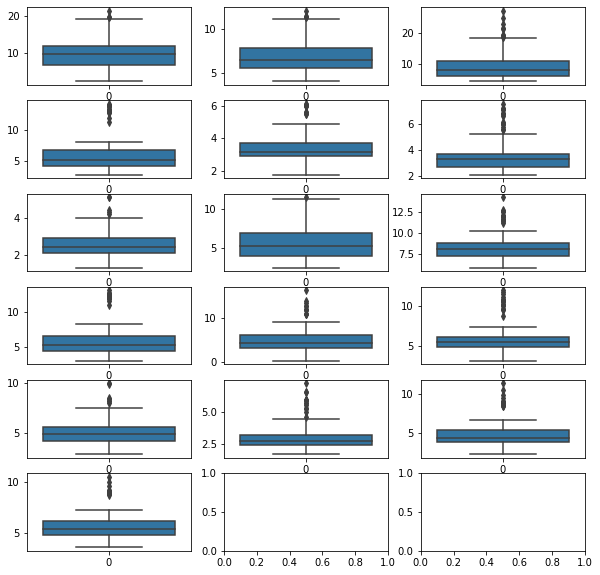

In [7]:

fig,axs=plt.subplots(6,3,figsize=(10,10))  
sns.boxplot(data=Data1["Agriculture"],ax=axs[0,0])
sns.boxplot(data=Data1["Business services"],ax=axs[0,1])
sns.boxplot(data=Data1["Construction"],ax=axs[0,2])
sns.boxplot(data=Data1["Durable goods manufacturing"],ax=axs[1,0])
sns.boxplot(data=Data1["Education and Health"],ax=axs[1,1])   
sns.boxplot(data=Data1["Finance"],ax=axs[1,2])
sns.boxplot(data=Data1["Government"],ax=axs[2,0])
sns.boxplot(data=Data1["Information"],ax=axs[2,1])
sns.boxplot(data=Data1["Leisure and hospitality"],ax=axs[2,2])
sns.boxplot(data=Data1["Manufacturing"],ax=axs[3,0])
sns.boxplot(data=Data1["Mining and Extraction"],ax=axs[3,1])
sns.boxplot(data=Data1["Nondurable goods manufacturing"],ax=axs[3,2])
sns.boxplot(data=Data1["Other"],ax=axs[4,0])
sns.boxplot(data=Data1["Self-employed"],ax=axs[4,1])
sns.boxplot(data=Data1["Transportation and Utilities"],ax=axs[4,2])
sns.boxplot(data=Data1["Wholesale and Retail Trade"],ax=axs[5,0])


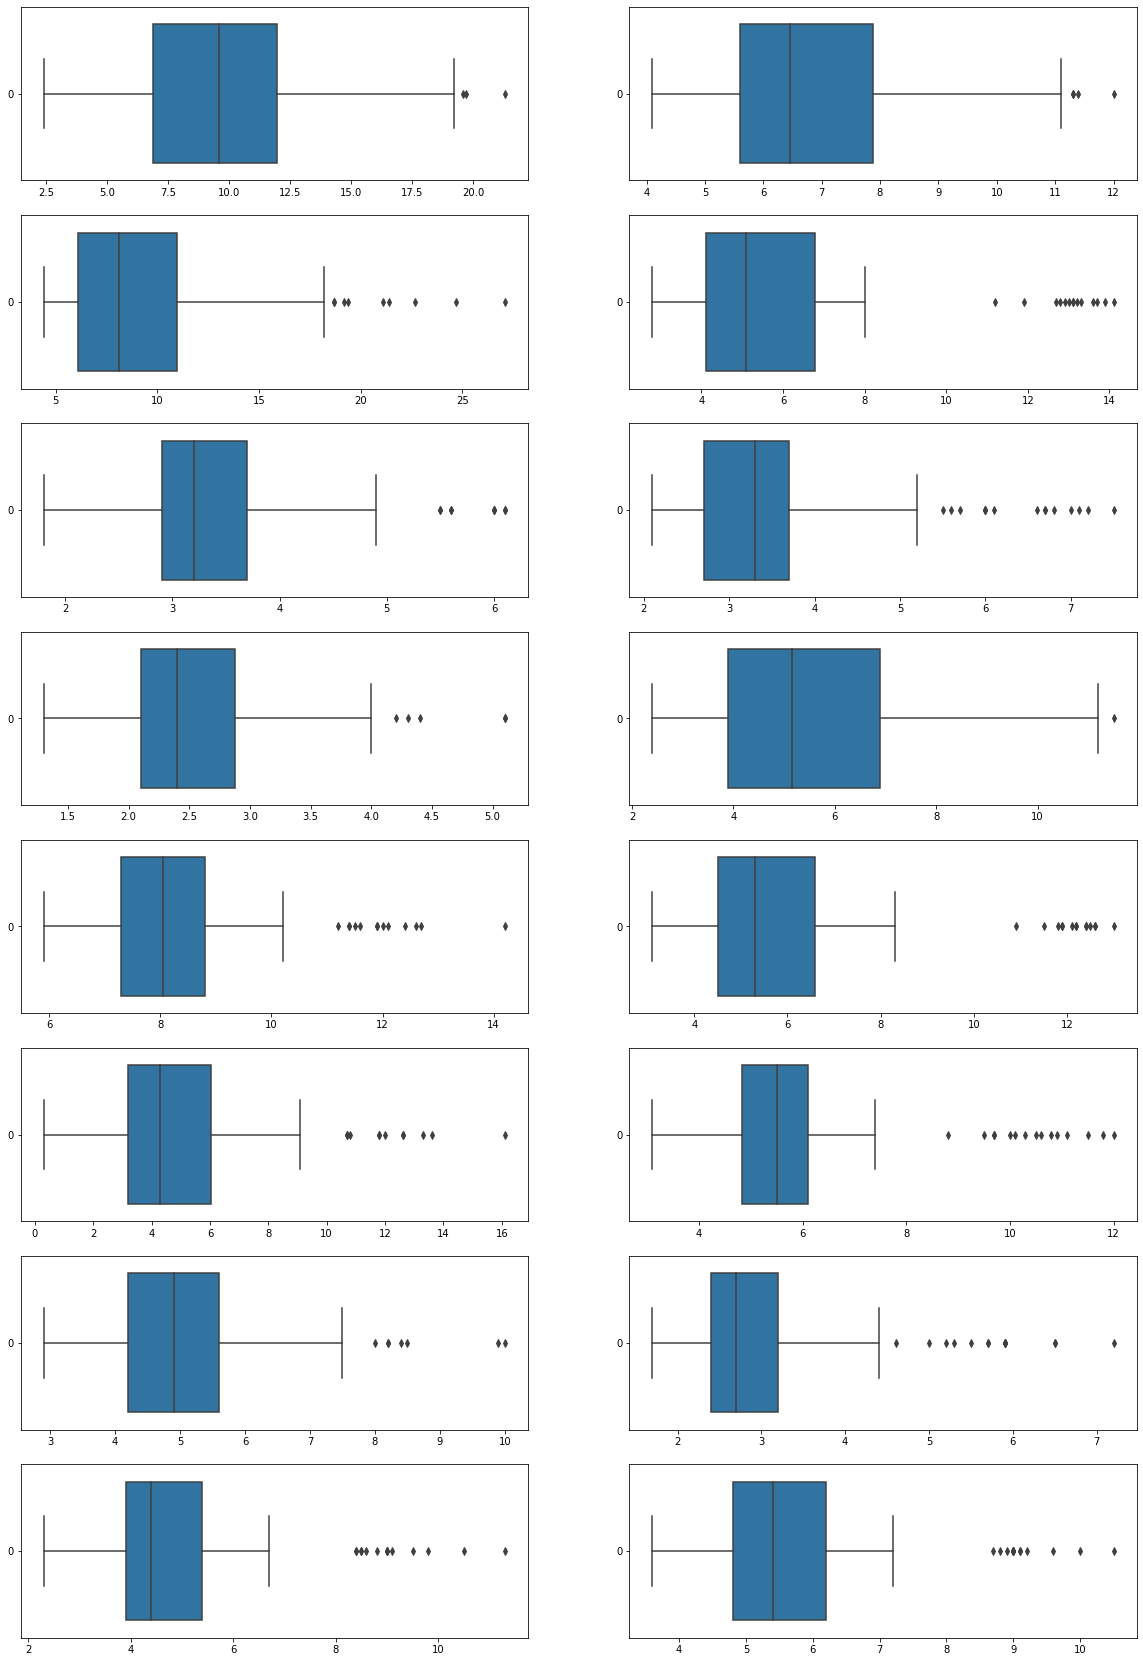

In [8]:

fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.boxplot(data=Data1[a[j]],ax=axs[z][y],orient='h')
            j=j+1

## Q3-Using line chart Visualize the unemployment rate of workers by industry. 

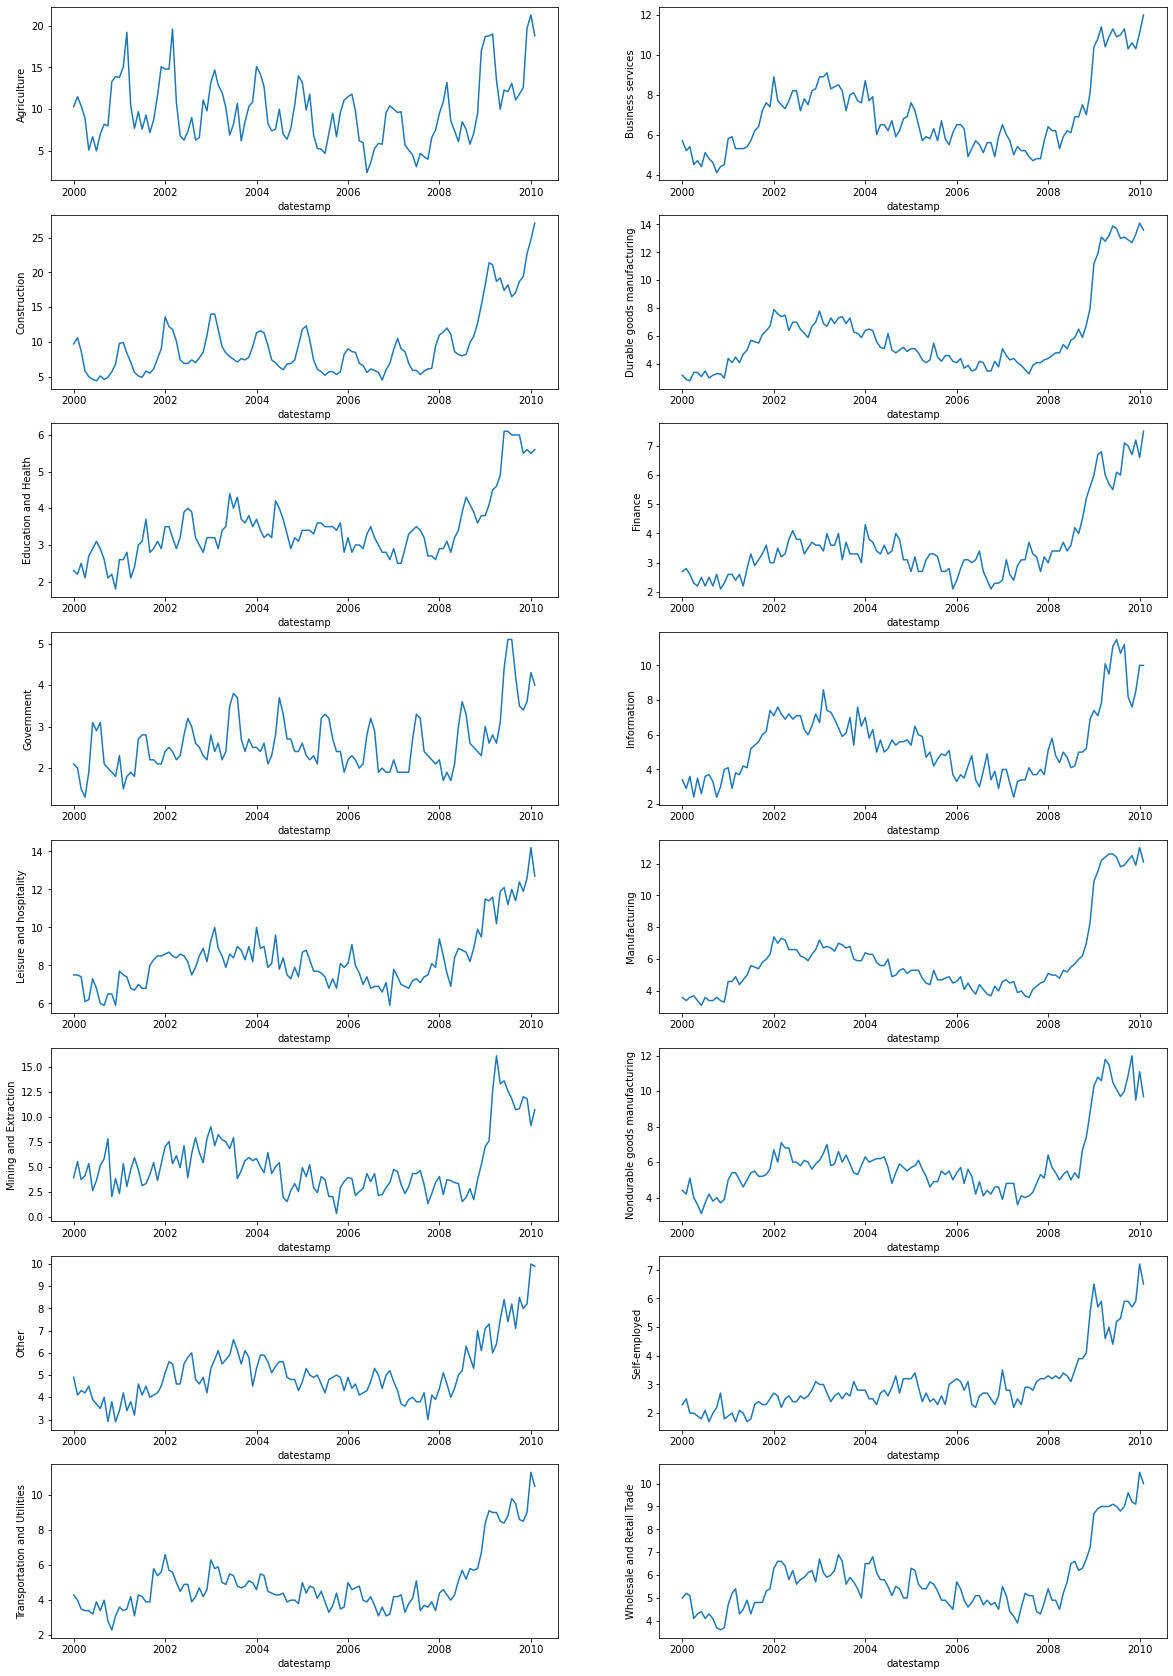

In [9]:


fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.lineplot(data=Data1[a[j]],ax=axs[z][y])
            j=j+1

## Q4-Plot the monthly and yearly trends. 

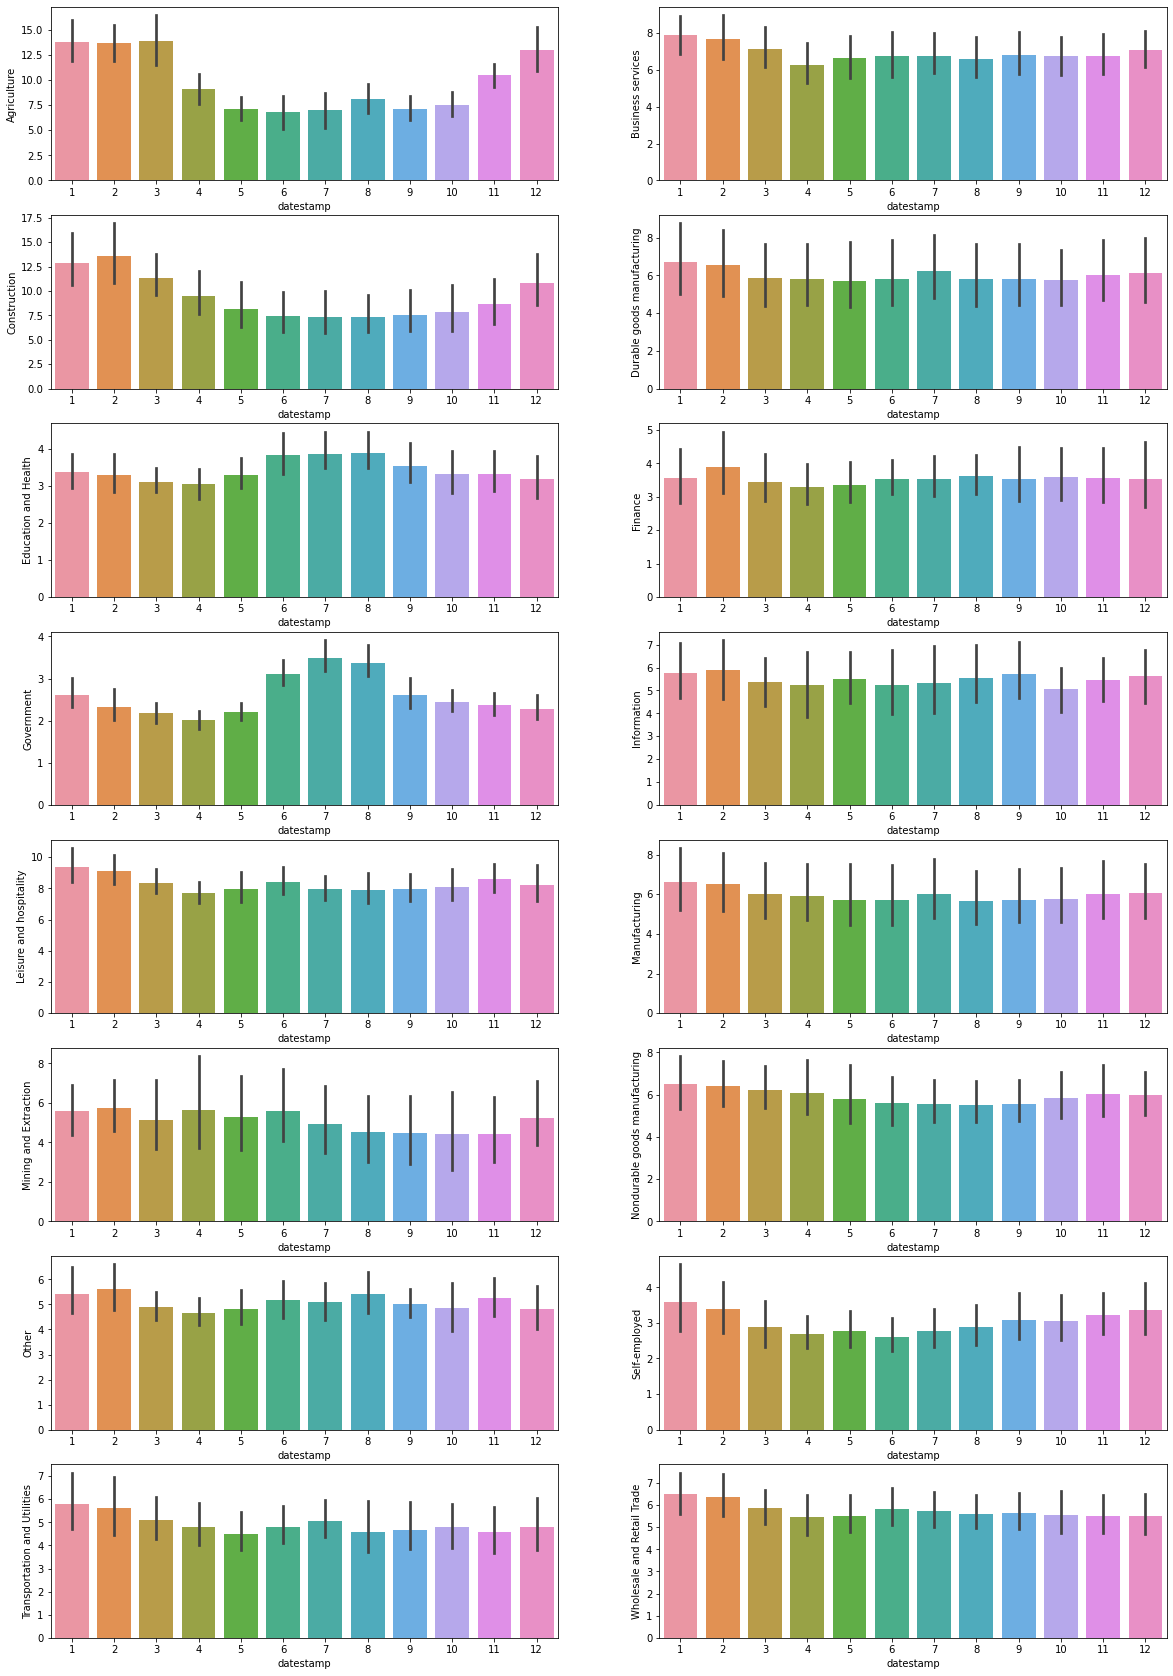

In [10]:

fig,axs=plt.subplots(8,2,figsize=(20,30))
j=0
a=Data1.columns
for z in range(0,8,1):
        for y in range(0,2,1):
            sns.barplot(y=Data1[a[j]],x=Data1.index.month,ax=axs[z][y])
            j=j+1

## Q5-Apply time series decomposition to your dataset to visualize the trend and seasonality

## Q6-Visualize the seasonality of Agriculture, Health and Finance sector 

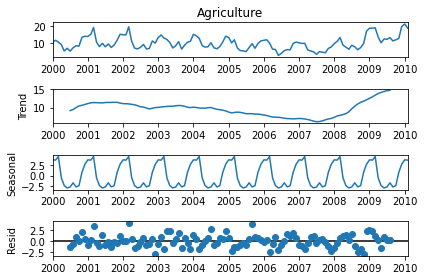

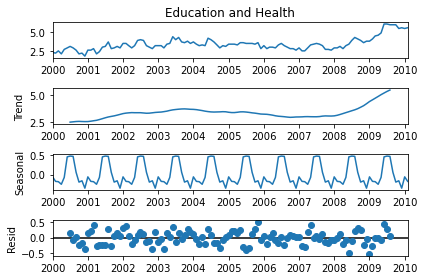

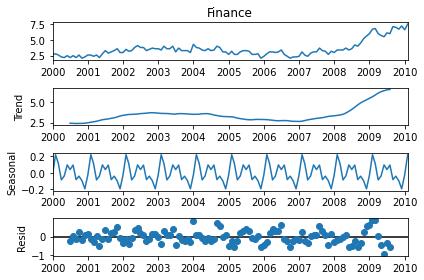

In [11]:


j=0
a=['Agriculture','Education and Health','Finance']
for z in range(0,3,1):
            result = seasonal_decompose(Data1[a[j]], model='additive')
            result.plot()
            plt.show()
            j=j+1

## Q7-Visualize the seasonality of multiple time series and the correlation between each time series in the dataset

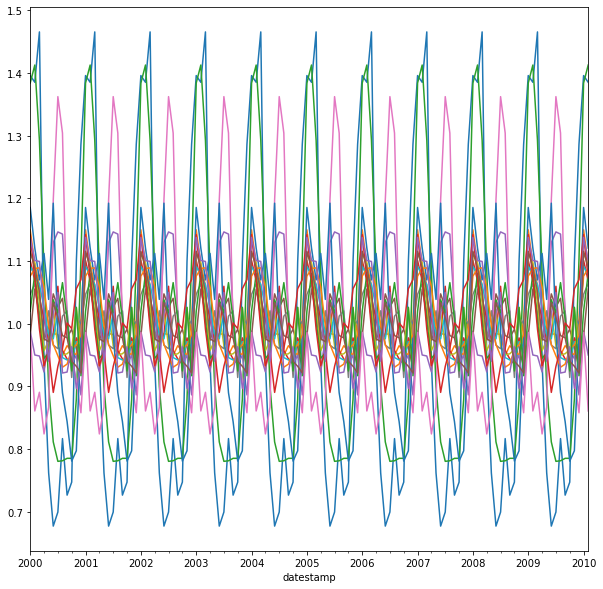

In [13]:
for i in Data1.columns:
    result=seasonal_decompose(Data1[i], model='multiplicable', period=12)
    result.seasonal.plot(figsize=(10,10))

<AxesSubplot:>

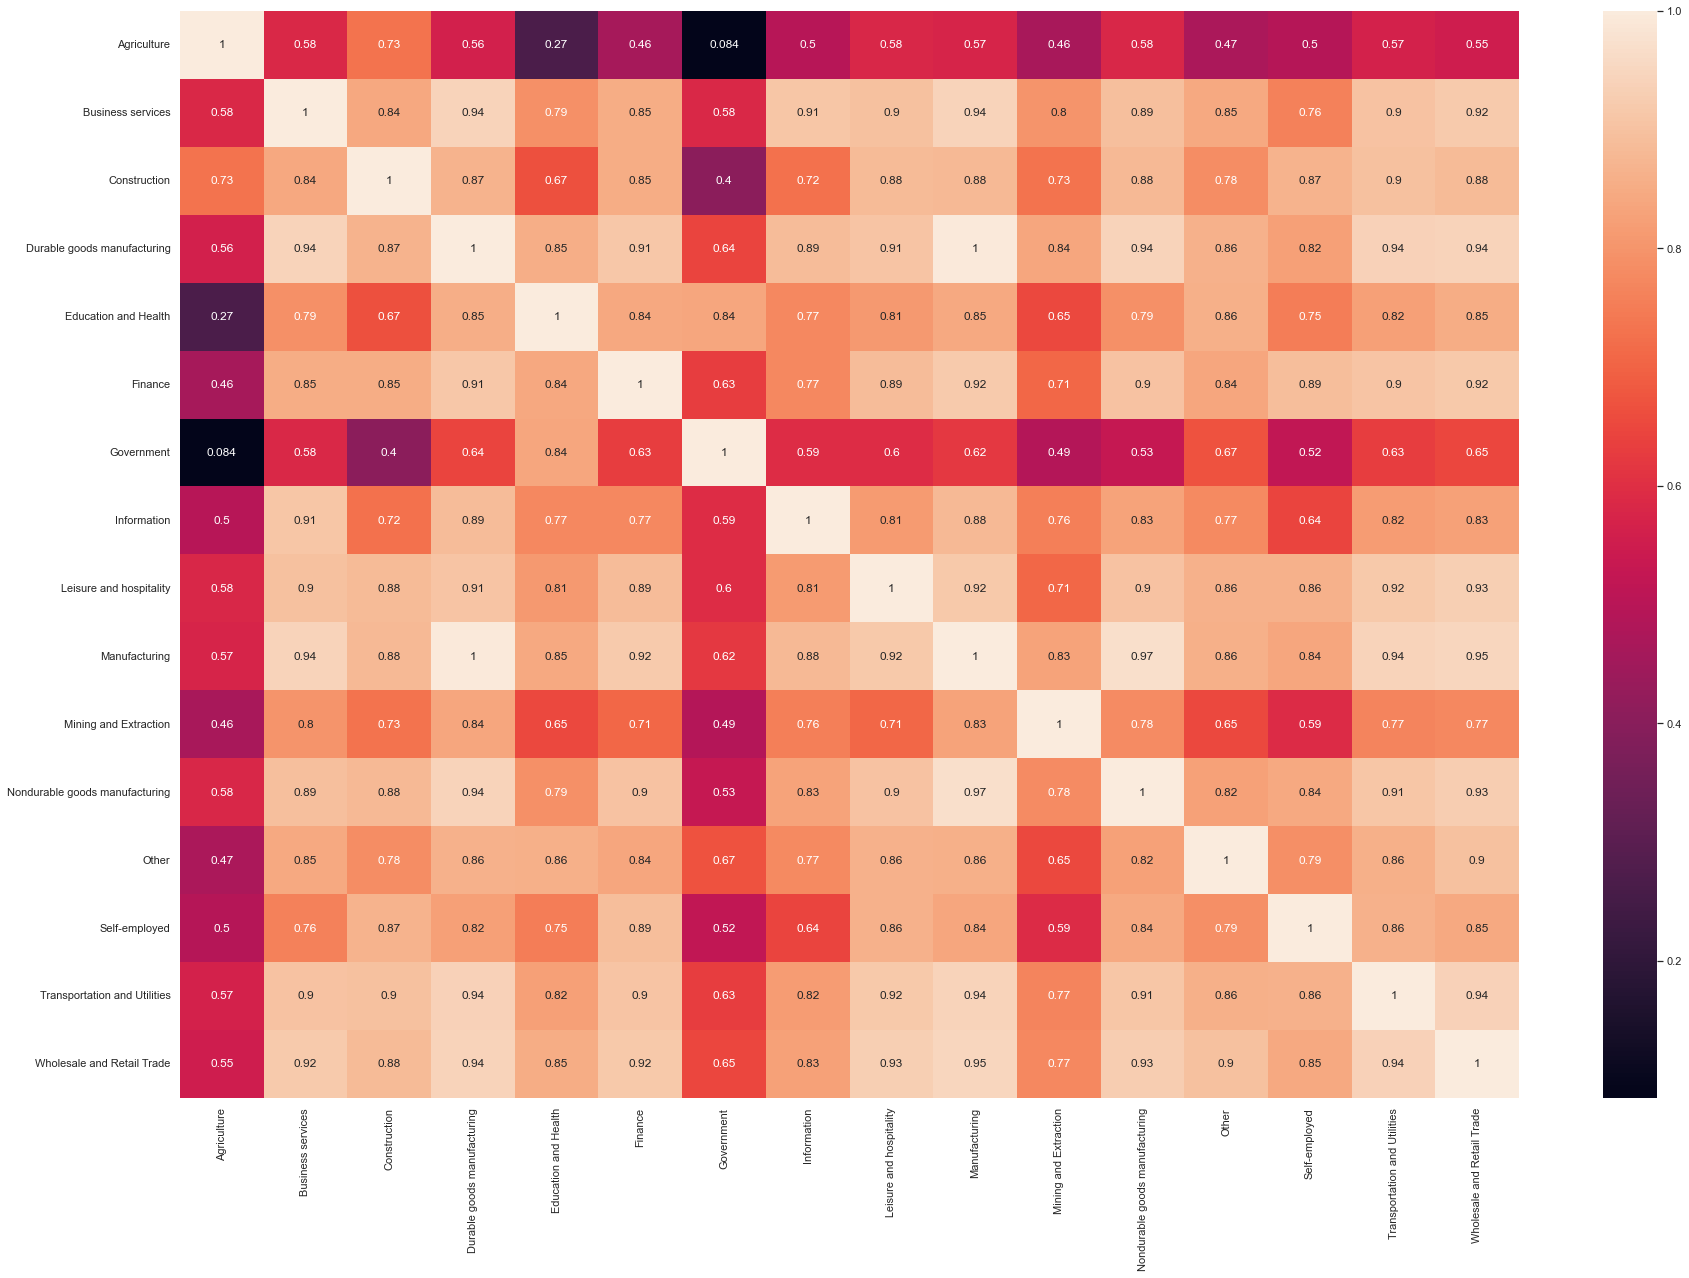

In [14]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(Data1.corr(), annot=True)